<a href="https://colab.research.google.com/github/MAN-74/IT326-Project/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/MAN-74/IT326-Project.git

Cloning into 'IT326-Project'...
remote: Enumerating objects: 291, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 291 (delta 66), reused 111 (delta 48), pack-reused 141 (from 1)
Receiving objects: 100% (291/291), 4.10 MiB | 10.70 MiB/s, done.
Resolving deltas: 100% (142/142), done.


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#Balance data:
###-Check if the data is balanced or not:

In [ ]:
import pandas as pd

data = pd.read_csv('/content/IT326-Project/Dataset/HousePricing.csv')

selector_values = data['price']

num_HighP = selector_values[selector_values == 1].count()
num_LowP = selector_values[selector_values == 0].count()

total = num_HighP + num_LowP
percentage_high = (num_HighP / total) * 100
percentage_low= (num_LowP / total) * 100

print("Number of high price Houses:", num_HighP)
print("Number of low price Houses:", num_LowP)
print("___")
print("Percentage of High prices: {:.2f}%".format(percentage_high))
print("Percentage of Low prices: {:.2f}%".format(percentage_low))

Number of high price Houses: 270
Number of low price Houses: 275
___
Percentage of High prices: 49.54%
Percentage of Low prices: 50.46%


The dataset contains 270 high-price houses (49.54%) and 275 low-price houses (50.46%), with a negligible difference of 0.92% between the two classes. This indicates a well-balanced dataset, as the proportions of the classes are nearly equal.

#1. Classification:
 Classification is the task of assigning labels to data based on its features which is a supervised learning technique. To assess a classification model's performance, we use a train-test split, dividing the data into a training set for model building and a testing set for evaluation. We perform multiple splits, such as 70-30, 80-20, and 90-10, to check the model's consistency and robustness across different data subsets. This approach ensures reliable and generalizable model evaluations and use the information gain(ID3), Gain ratio(C5.0), and Gini index (CART) algorithms on all of the 3 splits.

##Information Gain (entropy):
Splitting Data into:70% Training and 30% Test

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/HousePricing.csv")
df = pd.DataFrame(data)
print(df.head())

       area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  0.686780       4.0        2.0      3.0         1          0         0   
1  0.843390       4.0        3.5      3.5         1          0         0   
2  0.945085       3.0        2.0      2.0         1          0         1   
3  0.694915       4.0        2.0      2.0         1          0         1   
4  0.686780       4.0        1.0      2.0         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  \
0                0                1      2.0         1                 3   
1                0                1      2.5         0                 3   
2                0                0      2.0         1                 2   
3                0                1      2.5         1                 3   
4                0                1      2.0         0                 3   

   price  
0      1  
1      1  
2      1  
3      1  
4      1  


In [ ]:
fn=df.keys().tolist() [:-1]
X=df[fn]
y=df['price']
print(fn)

['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


Here we start splitting the data we have int two one is the Training data and one is for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy',random_state=1)

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)

#Confusion matrix:

[[72 16]
 [22 54]]


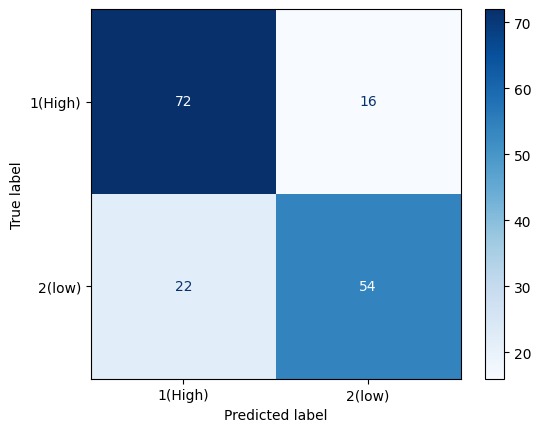

In [ ]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# Assuming you already have cm, y_test, and y_pred computed
cm = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(High)', 2: '2(low)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix displayed in the image summarizes the performance of a classification model with two class labeled as "High" and "Low." .The confusion matrix provides a performance evaluation of the classification model. In this 2x2 matrix:

 •	Top-Left Cell (72): Represents the number of instances of the negative class that were correctly classified as negative (True Negatives, TN).

 •	Top-Right Cell (16): Represents the number of instances of the negative class that were incorrectly classified as positive (False Positives, FP).

 •	Bottom-Left Cell (22): Represents the number of instances of the positive class that were incorrectly classified as negative (False Negatives, FN).

 •	Bottom-Right Cell (54): Represents the number of instances of the positive class that were correctly classified as positive (True Positives, TP).

This matrix shows how well the model distinguishes between the positive and negative classes, with correct classifications appearing on the diagonal (top-left and bottom-right cells).

#Decision Tree:

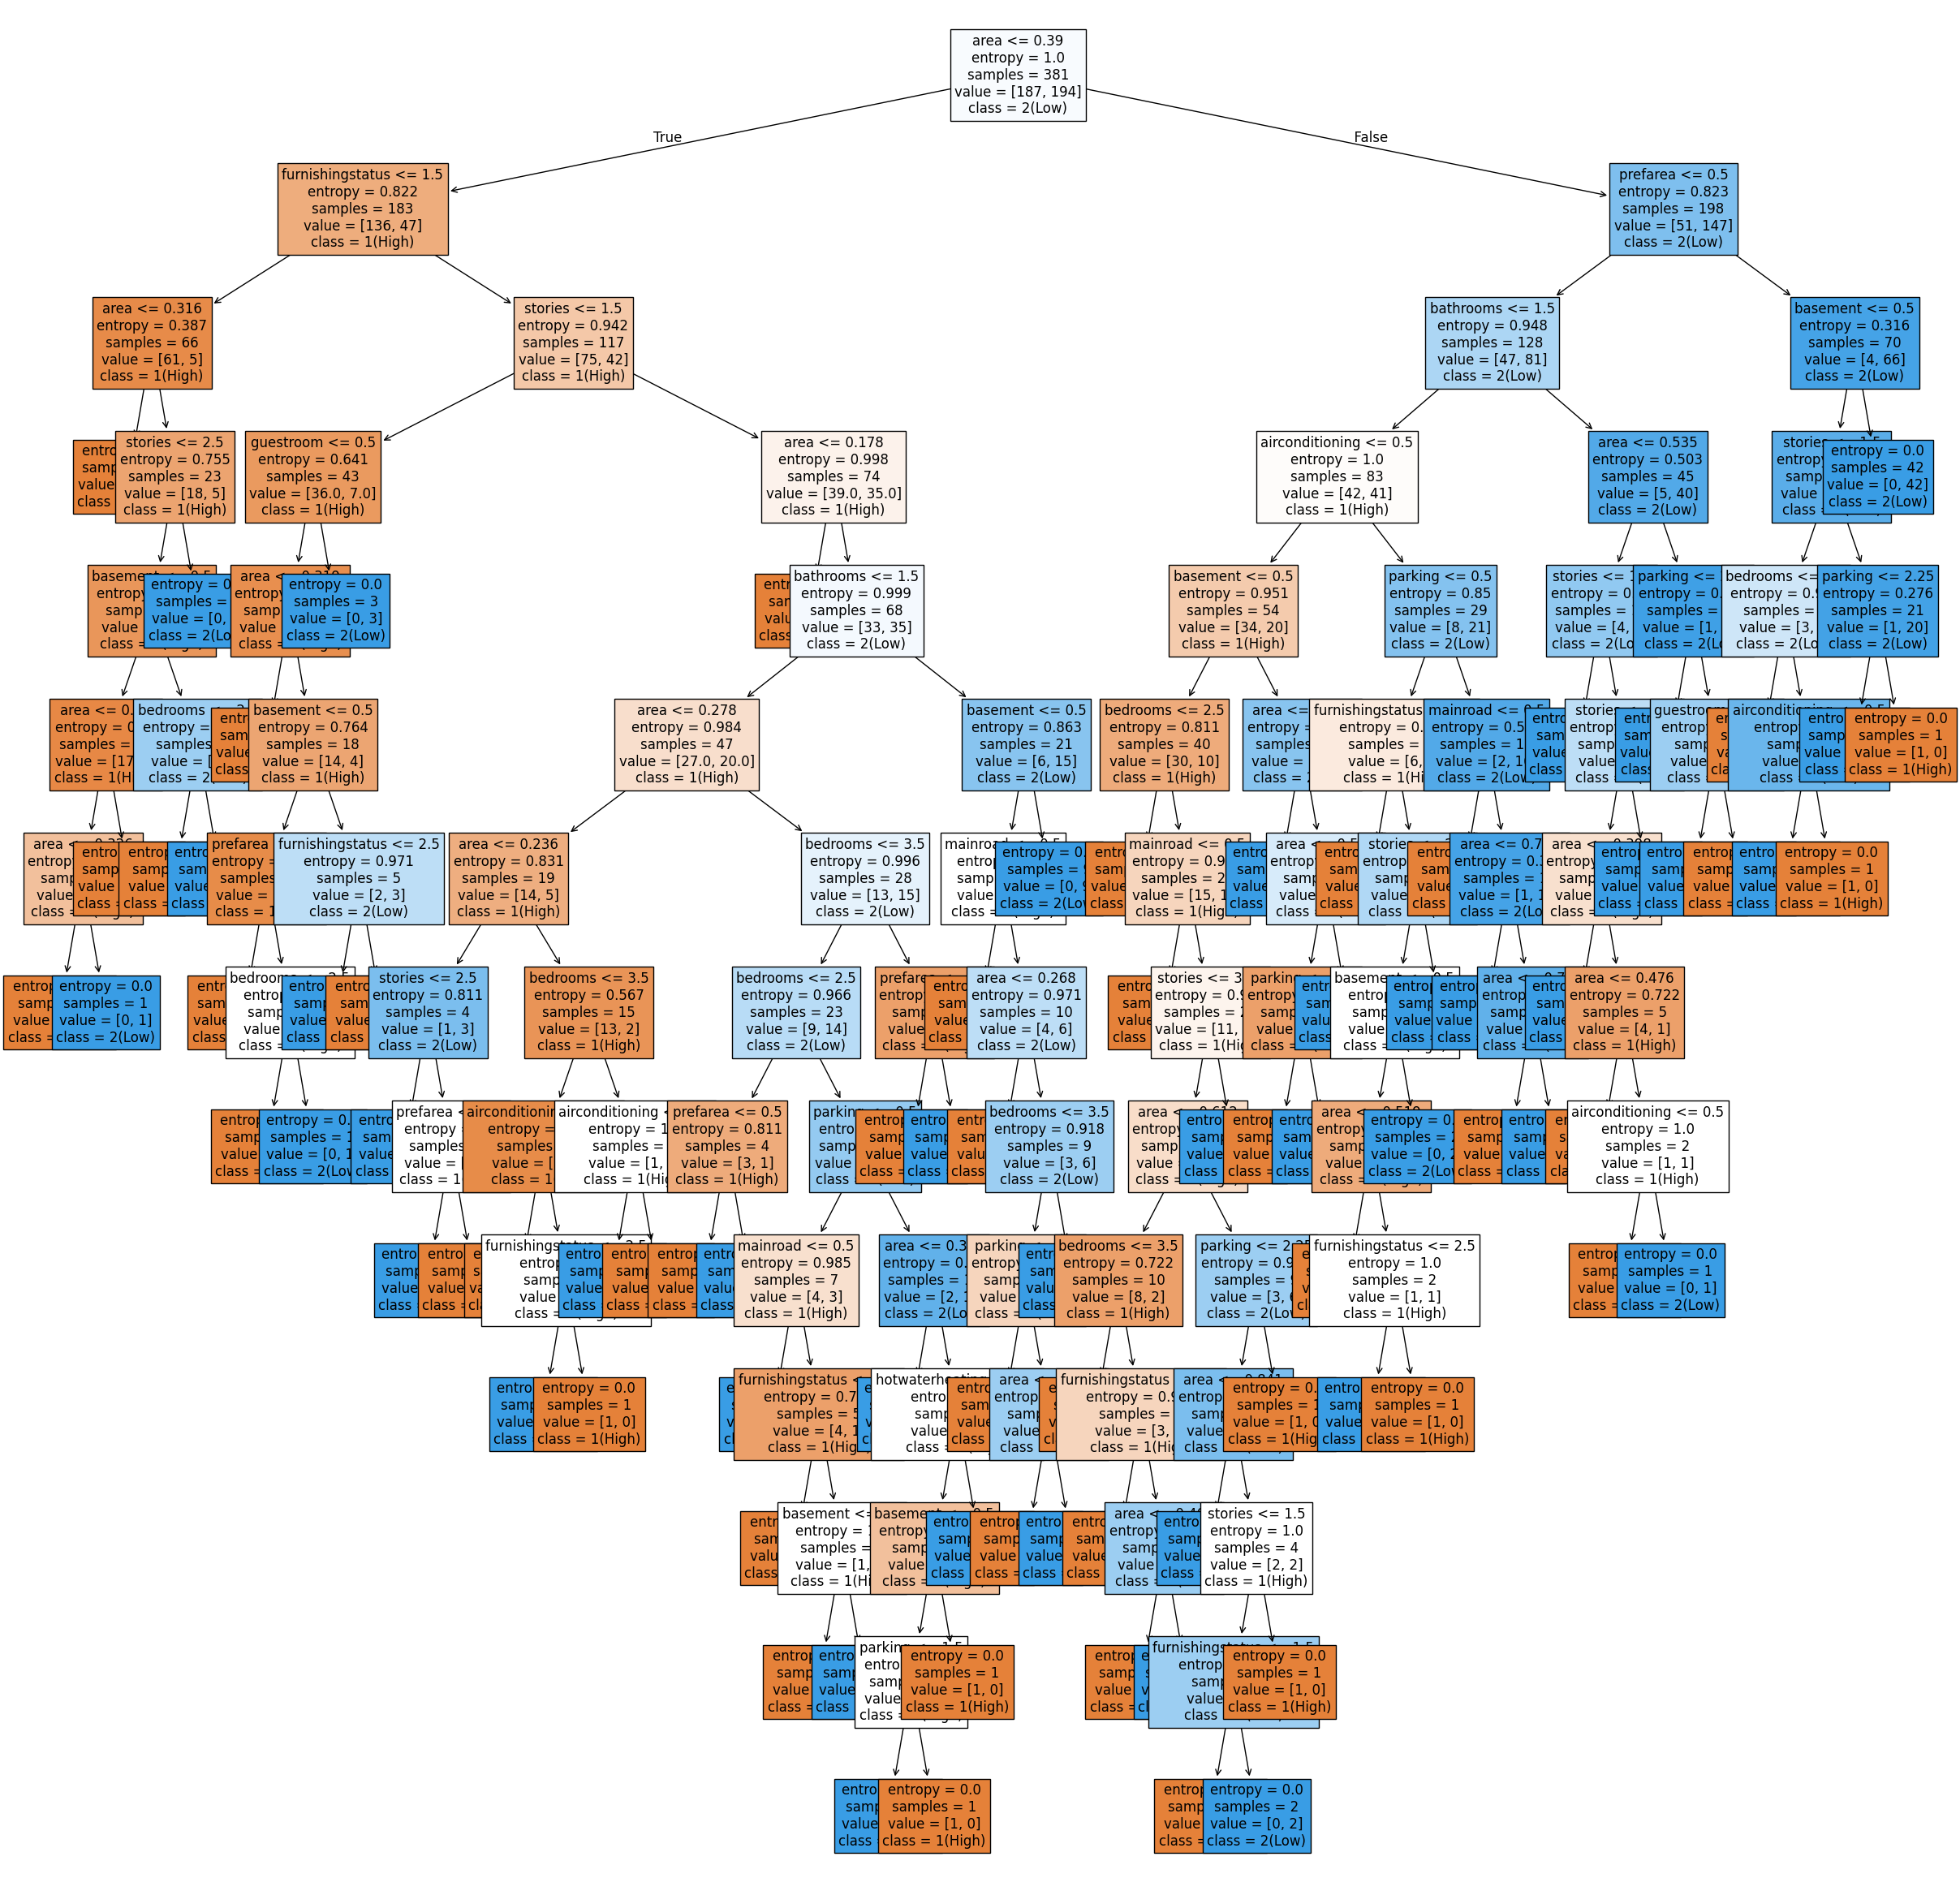

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30, 30), dpi=100)

# Define class labels for display
class_labels = {1: '1(High)', 2: '2(Low)'}

# Plot the tree with a larger font size
tree.plot_tree(
    clf,
    feature_names=fn,
    class_names=[class_labels[1], class_labels[2]],
    filled=True,
    fontsize=12  # Adjust this value as needed for readability
)

plt.show()

In the decision tree, the area feature is used as the first split, dividing samples based on their area values. This initial split helps separate the data into groups with potentially different classifications, setting the foundation for further branching and improving classification accuracy as the tree progresses.

 •	Importance: The choice of area <= 0.39 at the root node highlights area as a key feature in distinguishing classes.

 •	Branching: This split creates two major branches that the tree further subdivides, each aiming to improve purity regarding the target classes.

 •	Class Distribution: Likely, samples with area <= 0.39 tend to belong more to one class, while samples with area > 0.39 tend to belong to the other class.


  The decision tree uses area <= 0.39 as an effective first step to separate the data, guiding the model toward more accurate predictions by isolating distinct class distributions early in the structure.
  


#Completing in model evaluation and selection:

In [ ]:

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[72 16]
 [22 54]]
Accuracy: 0.7682926829268293
Error Rate: 0.23170731707317072
Sensitivity: 0.7105263157894737
Specificity: 0.8181818181818182
Precision: 0.7714285714285715


•  Accuracy: Accuracy measures the overall correctness of the model. In this case, it is 0. 768 (76.8%).

•  Error Rate: The Error Rate represents the proportion of wrong predictions. Here, it is 0.231 (23.1 %).

•  Sensitivity (Recall): indicates the model's ability to correctly identify positive cases. It is 0.71 (71%).

•  Specificity:measures the model's ability to correctly identify negative cases. Here, it is 0.818 (81.8%).

•  Precision: indicates the accuracy of positive predictions, showing how many predicted positives are actually positive. It is 0.771 (77.1%).

#Splitting Data into:60% Training and 40% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf2 = DecisionTreeClassifier(criterion='entropy',random_state=1)

clf2 = clf2. fit (X_train, y_train)

y_pred = clf2.predict (X_test)

Here we start splitting the data we have int two one is the Training data and one is for testing.

#Confusion matrix:

[[85 28]
 [26 79]]


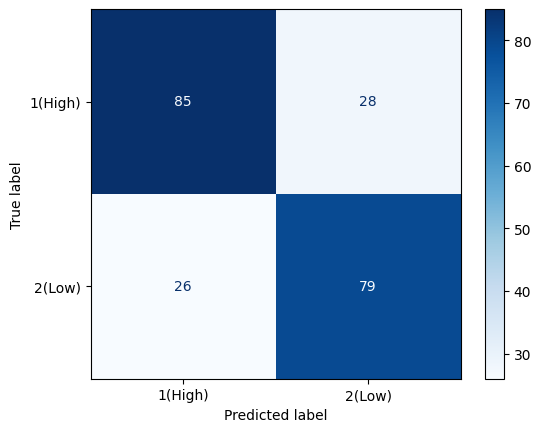

In [ ]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# Assuming you already have cm, y_test, and y_pred computed
cm = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(High)', 2: '2(Low)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix displayed in the image summarizes the performance of a classification model with two class labeled as "High" and "Low." .The confusion matrix provides a performance evaluation of the classification model. In this 2x2 matrix:

•	Top-Left Cell (85): Represents the number of instances of the negative class that were correctly classified as negative (True Negatives, TN).

•	Top-Right Cell (28): Represents the number of instances of the negative class that were incorrectly classified as positive (False Positives, FP).

•	Bottom-Left Cell (26): Represents the number of instances of the positive class that were incorrectly classified as negative (False Negatives, FN).

•	Bottom-Right Cell (79): Represents the number of instances of the positive class that were correctly classified as positive (True Positives, TP).

This matrix shows how well the model distinguishes between the positive and negative classes, with correct classifications appearing on the diagonal (top-left and bottom-right cells).

#Decision Tree:

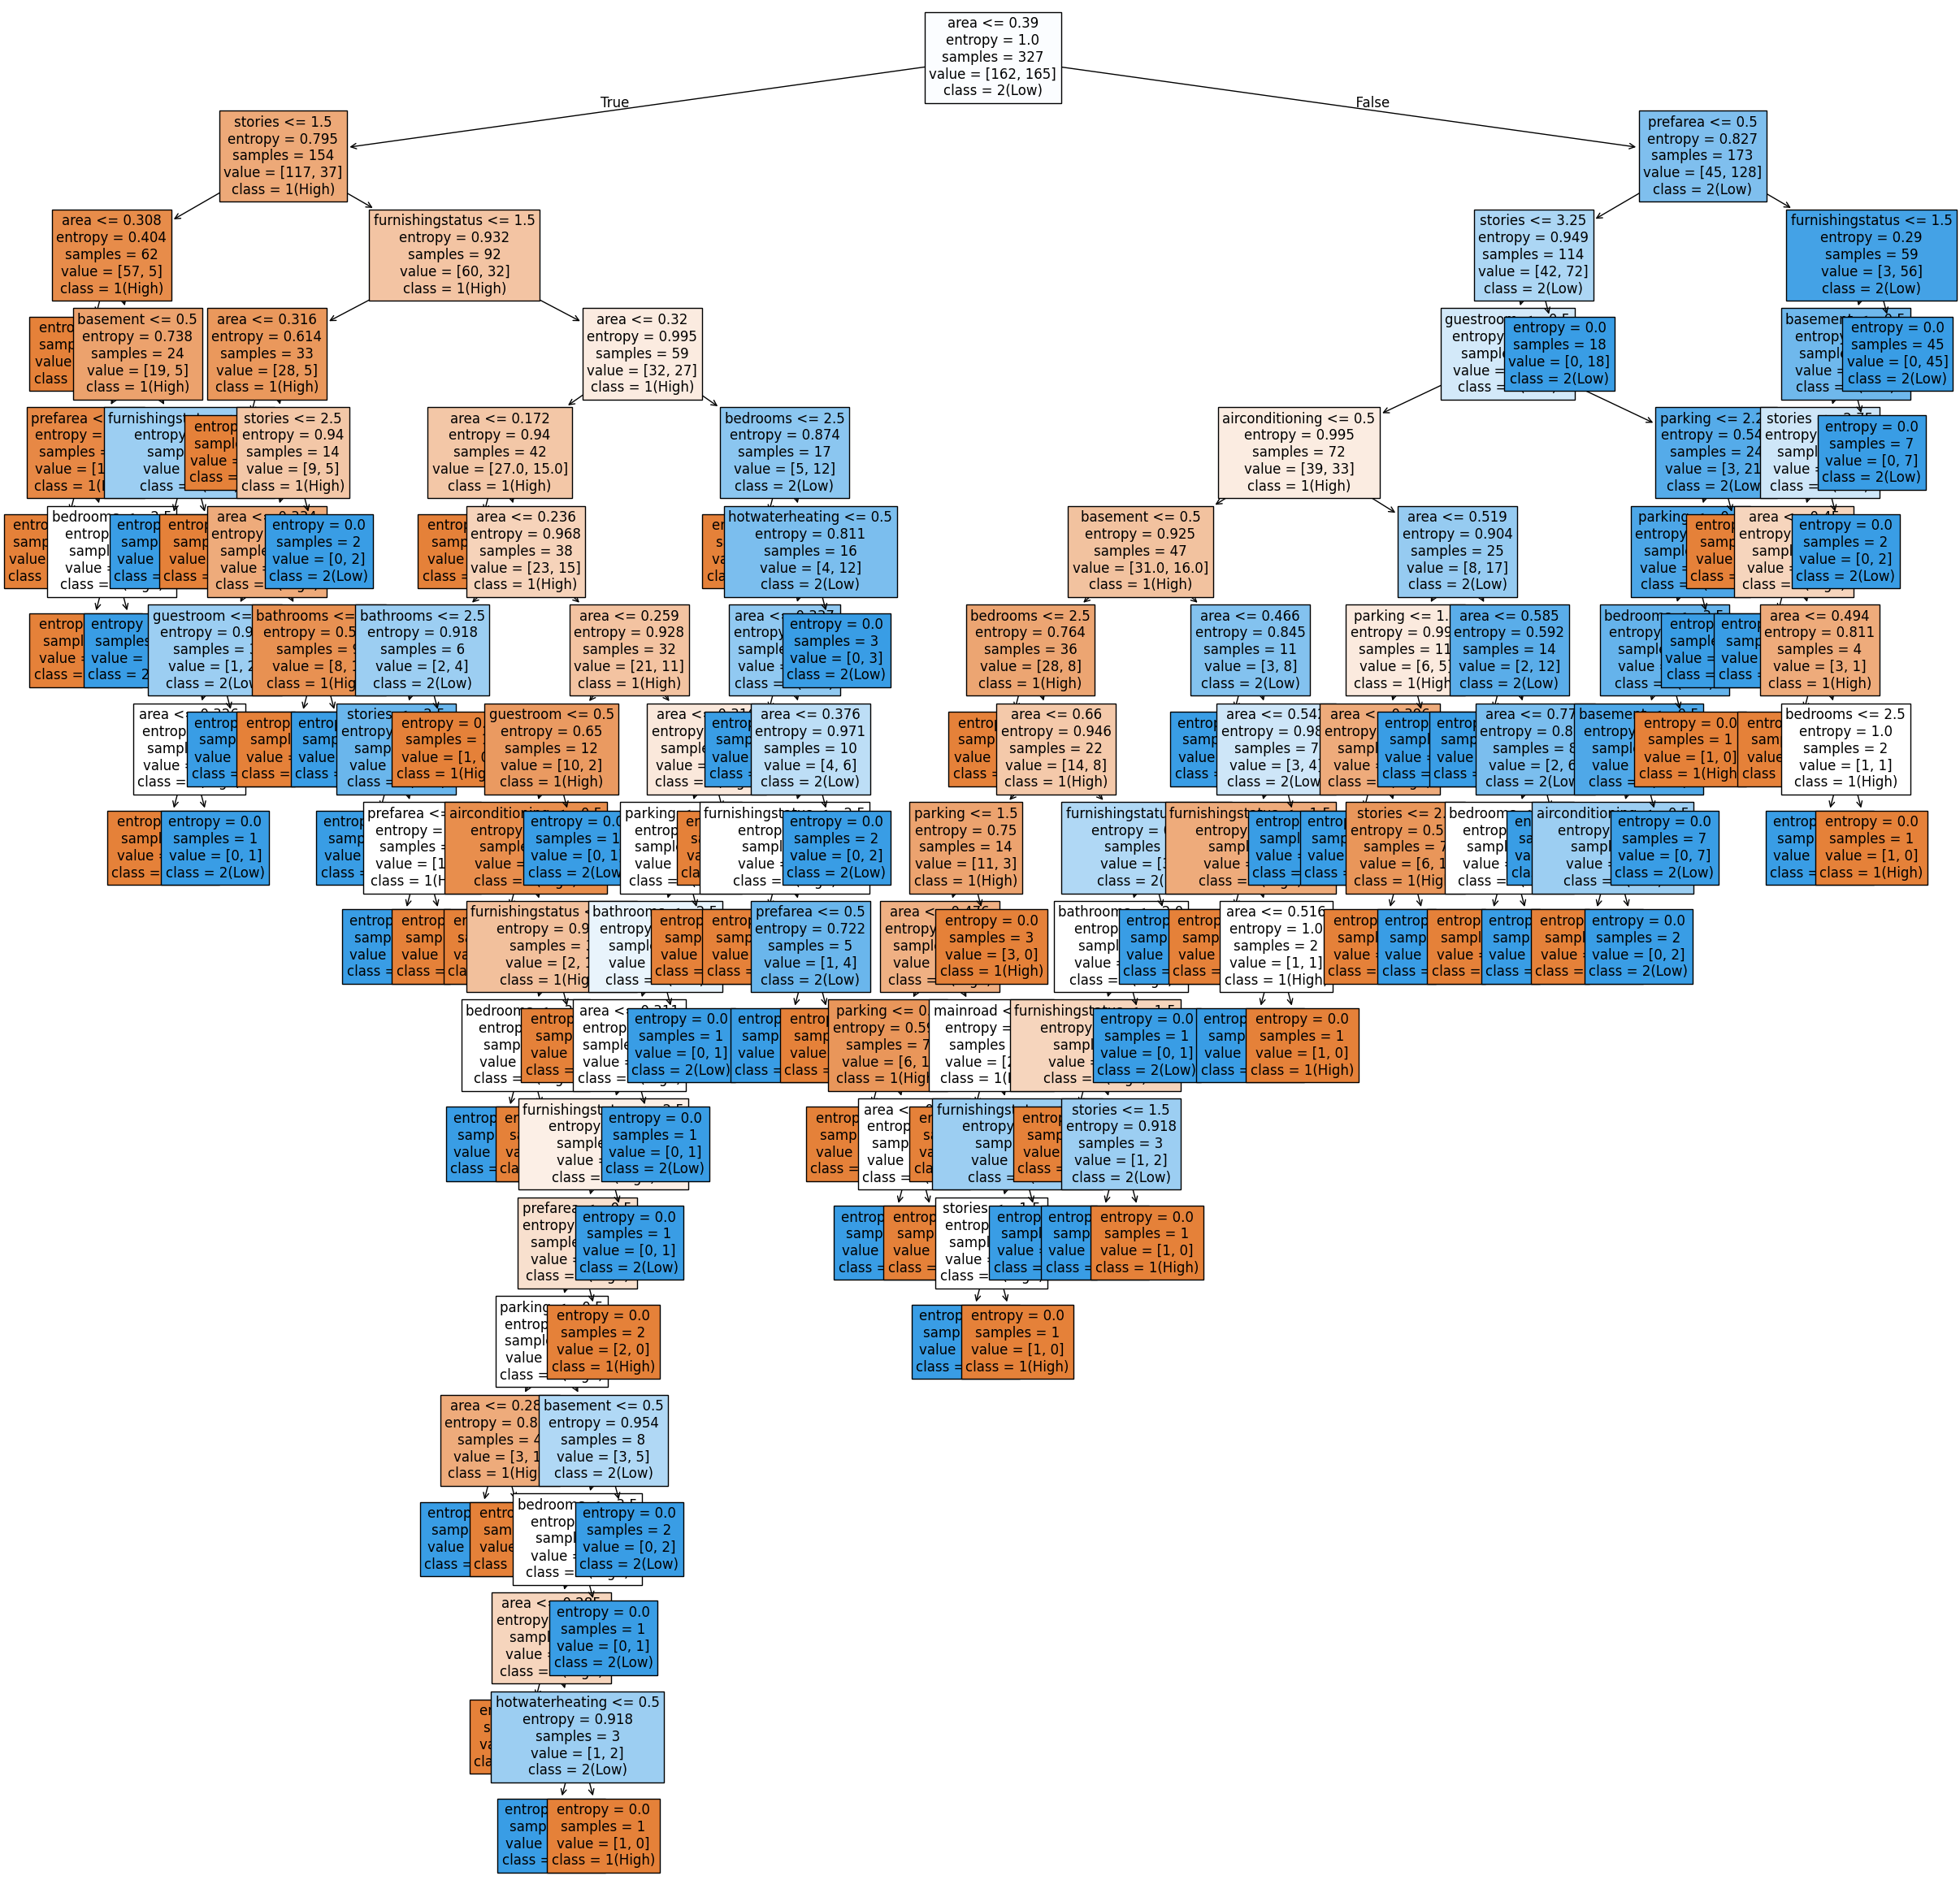

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30, 30), dpi=100)

# Define class labels for display
class_labels = {1: '1(High)', 2: '2(Low)'}

# Plot the tree with a larger font size
tree.plot_tree(
    clf2,
    feature_names=fn,
    class_names=[class_labels[1], class_labels[2]],
    filled=True,
    fontsize=12  # Adjust this value as needed for readability
)

plt.show()

In the decision tree, the area feature is used as the first split, dividing samples based on their area values. This initial split helps separate the data into groups with potentially different classifications, setting the foundation for further branching and improving classification accuracy as the tree progresses.

•	Importance: The choice of area <= 0.39 at the root node highlights area as a key feature in distinguishing classes.

•	Branching: This split creates two major branches that the tree further subdivides, each aiming to improve purity regarding the target classes.

•	Class Distribution: Likely, samples with area <= 0.39 tend to belong more to one class, while samples with area > 0.39 tend to belong to the other class.

The decision tree uses area <= 0.39 as an effective first step to separate the data, guiding the model toward more accurate predictions by isolating distinct class distributions early in the structure.

#Completing in model evaluation and selection:

In [ ]:
# Compute and print the confusion matrix
cm2 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm2)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm2[1, 1]
TN = cm2[0, 0]
FP = cm2[0, 1]
FN = cm2[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[85 28]
 [26 79]]
Accuracy: 0.7522935779816514
Error Rate: 0.24770642201834858
Sensitivity: 0.7523809523809524
Specificity: 0.7522123893805309
Precision: 0.7383177570093458


•  Accuracy: Accuracy measures the overall correctness of the model. In this case, it is 0.752(75.2 %).

•  Error Rate: The Error Rate represents the proportion of wrong predictions. Here, it is 0.247(24.7%).

•  Sensitivity (Recall): indicates the model's ability to correctly identify positive cases. It is 0.752(75.2%).

•  Specificity:measures the model's ability to correctly identify negative cases. Here, it is 0.752(75.2%).

 •  Precision: indicates the accuracy of positive predictions, showing how many predicted positives are actually positive. It is 0.738(73.8%).

#Conclusion
Comparison of Partition Strategies
The model was evaluated using three data splits: 80-20, 70-30, and 60-40, and their performance metrics highlight distinct trade-offs.

1. 80-20 Split
This split provides the best overall performance, with high accuracy, precision, and specificity. It effectively identifies positive cases and minimizes false positives, though the recall is slightly lower, indicating some missed positive instances.

2. 70-30 Split
The 70-30 split offers a balanced approach but shows a noticeable drop in performance compared to the 80-20 split. While still reasonably effective, the model exhibits lower accuracy, precision, and recall, reflecting a trade-off between training and testing data sizes.

3. 60-40 Split
With the highest proportion of test data, this split shows the lowest overall performance. The model struggles with precision, accuracy, and specificity, likely due to less training data. Recall is consistent but doesn’t compensate for the decrease in other metrics.

#Recommendation
The 80-20 split is the most suitable choice, as it ensures the highest model reliability while maintaining a balance across metrics.

# try


try